In [3]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from pathlib import Path

In [9]:
data_dir = Path('.')/'data'/'captured'/'raw'/'two_planes'
f = h5py.File(data_dir/"diffuser_10s.mat", "r")
diffuser_arr = np.array(f["diffuser"]).squeeze()
diffuser_captures = []
for i in range(len(diffuser_arr)):
    diffuser_captures.append(np.array(f[diffuser_arr[i]]).squeeze())
diffuser_captures = np.array(diffuser_captures)

#%%
f = h5py.File(data_dir/"scanned_10s_512res.mat", "r")
scanned_arr = np.array(f["scanned"]).squeeze()
scanned_captures = []
for i in range(len(scanned_arr)):
    scanned_captures.append(np.array(f[scanned_arr[i]]).squeeze())
scanned_captures = np.array(scanned_captures)

In [13]:
diffuser_sum = np.sum(diffuser_captures, axis=0)
diffuser = diffuser_sum[0::2] + diffuser_sum[1::2]
diffuser = diffuser[0::2] + diffuser[1::2]
scanned = np.sum(scanned_captures[0, ...], axis=(0, 1))  # 10 s exposure

In [17]:
# Align peaks
diff_peak = np.argmax(diffuser)
scan_peak = np.argmax(scanned)
offset = diff_peak - scan_peak
diffuser = np.roll(diffuser, -offset)

In [18]:
# Focus
n_min = 500
n_max = 1200
diffuser = diffuser[n_min:n_max]
# diffuser = diffuser/np.max(diffuser)
diffuser = diffuser/np.sum(diffuser)
scanned = scanned[n_min:n_max]
# scanned = scanned/np.max(scanned)
scanned = scanned/np.sum(scanned)

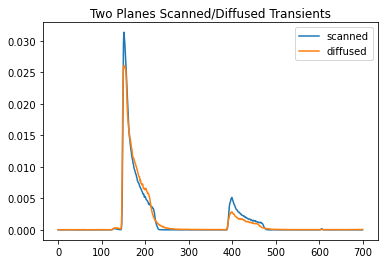

In [21]:
plt.plot(scanned, label='scanned')
plt.plot(diffuser, label='diffused')
plt.title('Two Planes Scanned/Diffused Transients')
plt.legend();